<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/logistic%ED%9A%8C%EA%B7%80%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 쇼핑몰에서 Lucky Bag 판매 개시 - 안에 7가지 생선 들어 있다

확률표시해야한다



In [46]:
# Lucky bag의 확률 : 7 마리의 생선
# 크기, 무게 (길이, 높이, 두께, 대각선 길이)
# 확률을 알고 싶으니까 분류 말고 회귀를 사용하자
# Sample 10개 중 농어 3마리 - > 0.3
# Sample 10개 중 빙어 5마리 - > 0.5
# Sample 10개 중 도미 3마리 - > 0.2

# sklearn의 kneightbor도 동일한 방식으로 확률 계산 가능
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
# 종, 무게, 길이, 대각선, 높이, 두께fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
# 종, 무게, 길이, 대각선, 높이, 두께
print(fish)

print(pd.unique(fish['Species']))

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [47]:
# 'Bream(도미)' 'Roach(잉어)' 'Whitefish(대구)' 'Parkki(붕어)' 'Perch(농어)' 'Pike(가물치)' 'Smelt(빙어)']
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력
#


[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [48]:
fish_target = fish['Species'].to_numpy() # fish[['Species']] 이렇게 하면 2차원 배열됨(금지)

In [49]:
# 훈련, 테스트 sample 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


In [50]:
# 전처리 과정 - 각 항목에서 표준점수를 빼기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)


KNeighborsClassifier(n_neighbors=3)

In [52]:
print("train_score: %f" %kn.score(train_scaled, train_target))
print("test_score: %f" %kn.score(test_scaled, test_target))

# 이전에는 0과 1을 찾는 2진 분류, 이번에는 target에 7종을 넣었음
print(kn.classes_)
# 2개 이상의 class가 포함된 문제 - 다중 분류

train_score: 0.890756
test_score: 0.850000
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [53]:
print(kn.predict(test_scaled[:5]))
print(test_scaled[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [54]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) # 번거로운 연산을 수행해서 쉽게 결과가 나오게
print(np.round(proba, decimals=4)) # 예측 결과를 반올림해서 소수점 4번째까지 표시
# 왼쪽 순서대로 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] - print(kn.classes_) 순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [55]:
# 이 model이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 봐야한다
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ] - Roach 1/3, Perch 2/3 -> 7개를 확률로 제공 불가능
# kn = KNeighborsClassifier(n_neighbors=3) <- n_neighbors=3: 그래서 안됬던것

[['Roach' 'Perch' 'Perch']]


In [56]:
# Logistic 회귀 - sklearn에서 제공
from sklearn.linear_model import LogisticRegression
# 이름은 회귀이지만 '분류'모델이며 ,선형 회귀와 동일하게 선형 방정식을 학습한다
# z = a*weight + b*length + c*diagonal + d*height + e*width + f
# a, b, c, d, e, f는 각 항목에 대한 가중치(중요도, 계수)
# z는 어떤 값도 가능하지만 확룰인 경우 0 ~ 1사이의 값
# z가 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸는 방법 - sigmoid 함수 or Logistic 함수

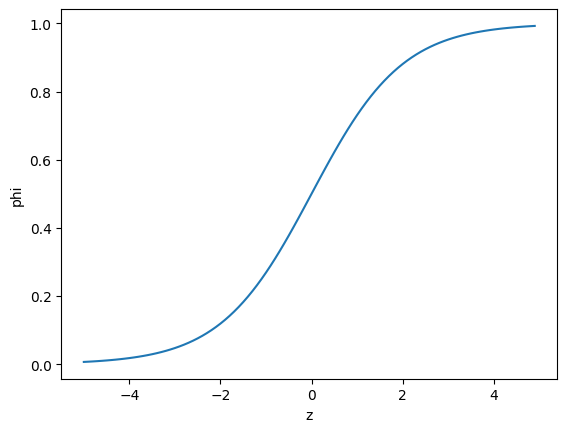

In [57]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5 ~ 5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp() 함수로 시그모이드 적용 - 선형 방정식의 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()
# -> 이 방법으로 0~1 사이 값의 확률로 해석할 수 있다

In [58]:
# 2진 분류인 경우 sigmoid함수 출력이 0.5보다 크면 +, 0.5보다 작으면 -로 판단,
# 단, 0.5인 경우 library마다 다른데 sklearn의 경우 -로 간주

In [59]:
# Logistic회귀로 2진 분류 수행하기
# numpy 배열은 true, flase 값을 전달하여 행을 선택할 수 있다
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])
# 결과: True 값만 출력된다 - 이 방법으로 도미(bream)와 빙어(smelt)의 행만 골라내자

['A' 'C']


In [64]:
# print(train_scaled)

In [66]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # Bream(도미) or Smelt(빙어)
# print(bream_smelt_indexes)
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Logistic 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt) # 훈련 시키면 2진 분류로 나온다

LogisticRegression()

In [70]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [76]:
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [77]:
# sample마다 2개의 확률이 출력된다
# 첫번째 열이 0에 대한 확률, 두번째 열이 1에 대한 확률
# sklearn의 target값은 Alphabet순으로 정렬된다 - 그래서 Bream이 먼저(-), 그 다음이 Smelt(+)

In [78]:
# 만약 Bream이 +이길 원한다면? 전처리 과정 중 Bream인 target값을 1로 설정

In [81]:
# Logistic 회귀로 학습한 계수(중요도)
print(lr.coef_, lr.intercept_)

# 선형 방정식에 대입해서 결과가 나온다
# z = - 0.40451732 * weight - 0.57582787 * length - 0.66248158 *diagonal - 1.01329614 * height - 0.73123131 * width - 2.16172774

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [88]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# 다음 z값들을 sigmoid함수에 통과시키면 확률을 얻을 수 있다
from scipy.special import expit # scipy에도 sigmoid함수가 있다

print(expit(decisions)) # phi = 1 / (1 + np.exp(-z))

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [98]:
# 2진분류에서 True가 아닌 것은 모두 False로 처리되었다
# 다중분류로 7개의 어종 분류하기
# 기본적으로 LogiticRegression은 반복적인 algorism 사용 (기본적으로 max_iter=100) - max_iter=1000으로 설정해서 사용하고
# Ridge 회귀와 앋은 계수 제곱 규제(L2 규제) - Ridge 회귀에서는 alpha 값을 설정해서 규제 량을 조절했다 - alpha가 크면 규제도 커진다
# LogiticRegression에서는 매개변수 C로 규제 - C가 작으면 규제가 커진다(기본값은 1) - 20으로 늘려서 완화

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 7개의 target으로 나온 결과
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [104]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [106]:
print(kn.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 알파벳 순으로 열 정렬시켜서 7개의 class를 구분함

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [112]:
# 다중 분류일 때의 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape) # (7, 5) (7,)
# (7, 5) - 7행을 가진 5개의 특성 사용
# (7,) - 7개의 행 - 2진 분류에서 보았던 z 7개를 계산한다
# 다중분류는 class마다 z값을 하나씩 계산한다는 의미
# 가장 높은 z값을 출력하는 class가 예측class

(7, 5) (7,)


In [121]:
# 2진분류에서는 sigmoid함수를 사용해서 z를 0과 1사이의 값으로 변환했다
# 다만, 다중분류에서는 softmax함수를 사용해서 z개의 값을 확률로 변환한다

decision = lr.decision_function(test_scaled[:5])
print()
for idx, z in enumerate(decision): print(f"{idx + 1}번째 sample의 z 값: \n{z}\n")



1번째 sample의 z 값: 
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

2번째 sample의 z 값: 
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

3번째 sample의 z 값: 
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

4번째 sample의 z 값: 
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

5번째 sample의 z 값: 
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



In [127]:
from scipy.special import softmax
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis = 1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con, columns=class_))

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
